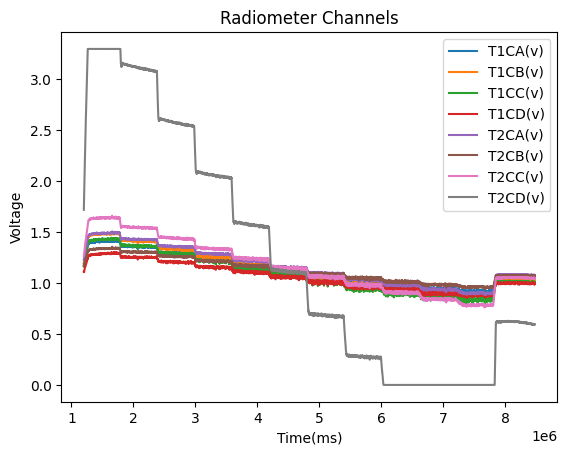

In [1]:
from os import walk
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

if __name__ == '__main__':
     file = 'radiometer1_25_5-55_061523_sensor.csv'
     data = pd.read_csv(file)
     channel_col = []
     internal_col = []
     nums = [1,2]
     channels = ['A', 'B', 'C', 'D']
     for num in nums:
          for chan in channels:
               channel_col.append("T" + str(num) + "C" + str(chan) + "(v)")
          internal_col.append("T" + str(num) +"Therm(c)")

     data[data["Time(ms)"] > 1200000].plot(x = "Time(ms)", y = channel_col)
     plt.title("Radiometer Channels")
     plt.ylabel("Voltage")
     plt.show()


Segment the data into different BB temps

In [2]:
#segment the data into the different BB temps
temp_dict = {}
temp_ranges = np.arange(55, 0, -5)
time_interval = 10 #minute length of each trial
lower_bound = 1200000 #time after s
time_interval_ms = 60000 * time_interval #convert minutes to milliseconds
for i in range(0, temp_ranges.size):
    temp_dict["BB" + str(temp_ranges[i])] = data[(data["Time(ms)"] > lower_bound) & (data["Time(ms)"] < (lower_bound + time_interval_ms))]
    lower_bound += time_interval_ms

{'BB55':       Time(ms)   T1CA(v)   T1CB(v)   T1CC(v)   T1CD(v)  T1Therm(c)   T2CA(v)  \
1062   1200357  1.189329  1.200520  1.162348  1.108631   26.064006  1.229996   
1063   1201486  1.194797  1.205897  1.163051  1.108685   26.065548  1.230649   
1064   1202615  1.197515  1.211036  1.171439  1.114377   26.067957  1.235025   
1065   1203744  1.195245  1.210292  1.170238  1.113705   26.069467  1.239476   
1066   1204873  1.200957  1.216330  1.174223  1.115813   26.071458  1.245730   
...        ...       ...       ...       ...       ...         ...       ...   
1588   1794530  1.377007  1.440086  1.388435  1.267369   27.163092  1.442954   
1589   1795659  1.369179  1.430916  1.380878  1.263102   27.165395  1.438093   
1590   1796788  1.362207  1.422946  1.374634  1.257397   27.167358  1.435912   
1591   1797917  1.365156  1.428581  1.378870  1.261158   27.168916  1.434907   
1592   1799046  1.355300  1.414696  1.367624  1.250405   27.170711  1.434491   

       T2CB(v)   T2CC(v)   T2C

Plot the sensor readings at different blackbody temperatures

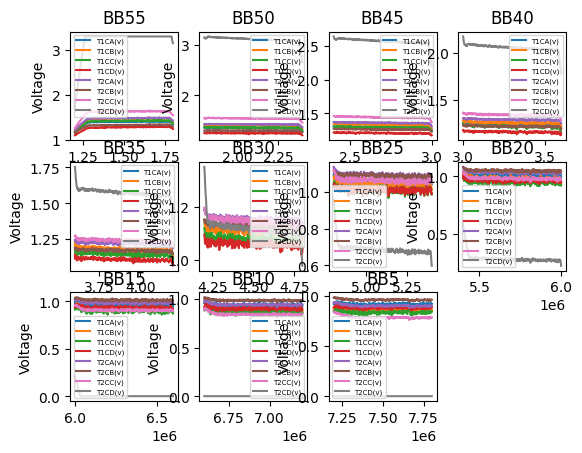

In [24]:
temp_max_min = pd.DataFrame()
plt.figure(1).tight_layout()
i = 1
for key in temp_dict:
    plt.subplot(3, 4, i)
    plt.plot(temp_dict[key].loc[:,"Time(ms)"], temp_dict[key].loc[:,channel_col])
    plt.title(key)
    plt.ylabel("Voltage")
    plt.legend(channel_col, fontsize = 5)
    i += 1
    max_temp = temp_dict[key].max() 
    max_temp_df = pd.DataFrame({'Max at ' + str(key): max_temp}).T

    min_temp = temp_dict[key].min() 
    min_temp_df = pd.DataFrame({'Min at ' + str(key): min_temp}).T
    temp_max_min= pd.concat([temp_max_min, max_temp_df, min_temp_df]) #transpose

plt.show()

In [25]:
display(temp_max_min)

,Time(ms),T1CA(v),T1CB(v),T1CC(v),T1CD(v),T1Therm(c),T2CA(v),T2CB(v),T2CC(v),T2CD(v),T2Therm(c)
Max at BB55,1799046.0,1.423199,1.498640,1.445970,1.304740,27.170711,1.507606,1.356943,1.660895,3.299175,27.124465
Min at BB55,1200357.0,1.189329,1.200520,1.162348,1.108631,26.064006,1.229996,1.172120,1.267959,1.719265,26.025600
Max at BB50,2399985.0,1.370046,1.431482,1.382562,1.263494,28.237964,1.442126,1.313869,1.563532,3.164122,28.197945
Min at BB50,1800175.0,1.301381,1.344740,1.300394,1.213301,27.172066,1.373725,1.270079,1.462176,2.653338,27.125952
Max at BB45,2999793.0,1.311418,1.354586,1.310593,1.222212,29.054228,1.374247,1.274704,1.460783,2.641151,29.019727
Min at BB45,2401114.0,1.252287,1.280101,1.239097,1.173643,28.239640,1.304411,1.225461,1.364712,2.200667,28.198941
Max at BB40,3599611.0,1.252155,1.280267,1.241164,1.176538,29.642338,1.305783,1.229615,1.363938,2.177048,29.614091
Min at BB40,3000922.0,1.188206,1.200380,1.166627,1.120458,29.055969,1.248541,1.189943,1.282487,1.774608,29.021280
Max at BB35,4199391.0,1.213038,1.228969,1.189937,1.143008,30.057968,1.245721,1.189020,1.276347,1.753044,30.027532
Min at BB35,3600740.0,1.122201,1.120849,1.090095,1.064355,29.644472,1.186674,1.146024,1.195596,1.362552,29.614928
